# Comparación de Métodos de Reducción de Dimensiones

In [1]:
# Librerías necesarias para manipulación de datos
import pandas as pd
from pathlib import Path

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Importación de Datos

Para esta demostración utilizaremos una versión limpia de los [datos de cáncer de mama compartidos en Kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset).

In [2]:
# Importa los datos en un DataFrame de Pandas
file_path = Path("../datos/breast_cancer_clean.csv")
cancer_df = pd.read_csv(file_path, index_col=0)

# Muestra un ejemplo de los datos
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Elimina la columna "diagnosis" ya que representa la predicción del diagnóstico, y además, es una variable no numérica
data_clean = cancer_df.drop("diagnosis", axis=1)

# Muestra un ejemplo de los datos limpios
data_clean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Estandarización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Crea una instancia de StandardScaler

# Estandariza los datos utilizando la instancia de StandarScaler
data_standardized = scaler.fit_transform(data_clean)

# Muestra los datos estandarizados
data_standardized[5]

array([-0.47637467, -0.8353353 , -0.38714807, -0.50565045,  2.23742148,
        1.24433549,  0.8663016 ,  0.82465565,  1.0054018 ,  1.89000504,
       -0.25507029, -0.59266165, -0.32130419, -0.28925822,  0.1563467 ,
        0.44554365,  0.1600252 , -0.06912355,  0.13411881,  0.48684584,
       -0.16549825, -0.31383633, -0.11500946, -0.24432021,  2.04851283,
        1.72161644,  1.2632432 ,  0.90588779,  1.75406939,  2.24180161])

In [5]:
# Define los colores para los puntos de los gráficos
dot_colors = cancer_df["diagnosis"].replace({'M': 1, 'B': 0})
dot_colors

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

## Funciones Auxiliares

In [6]:
# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Función para crear un gráfico en 2D
def grafico_2d(x, y, colores):
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, c=colores, alpha=0.7)
    plt.title("Reducción a 2 Componentes")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()
    
# Función para crear gráfico en 3D
def grafico_3d(x, y, z, colores):
    ax = plt.subplot(1, 2, 2, projection="3d")
    ax.scatter(x, y, z, c=colores, alpha=0.7)
    ax.set_title("Reducción a 3 Componentes")
    ax.set_xlabel("Componente 1")
    ax.set_ylabel("Componente 2")
    ax.set_zlabel("Componente 3")
    plt.show()

## Principal component analysis (PCA)

Documentación de [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) en scikit-learn.

In [8]:
# Importa PCA desde scikit-learn
from sklearn.decomposition import PCA

In [9]:
# PCA para 2 componentes
pca_2d = PCA(n_components=2)
pca_components_2d = pca_2d.fit_transform(data_standardized)

# PCA para 3 componentes
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(data_standardized)

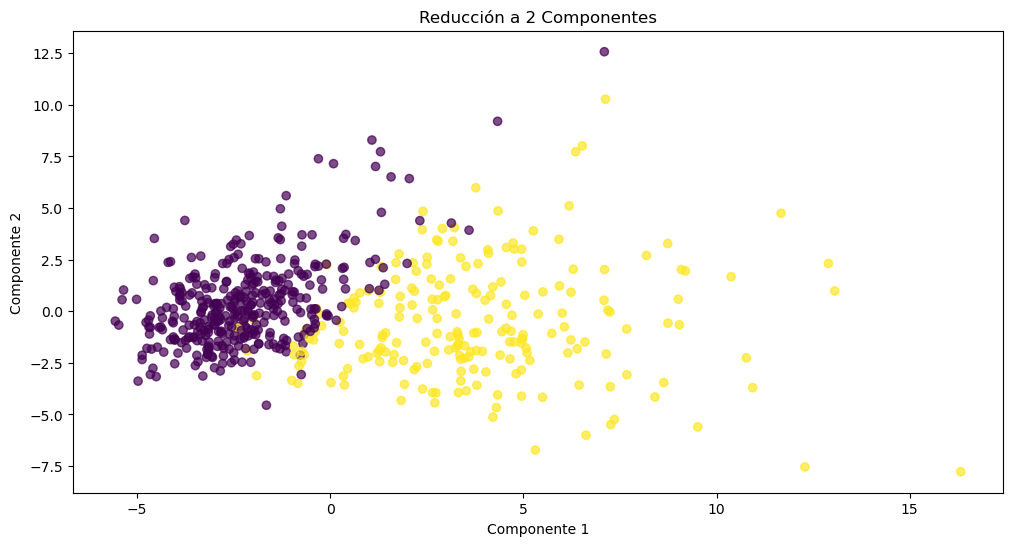

In [10]:
# Gráfico 2d
grafico_2d(pca_components_2d[:, 0], pca_components_2d[:, 1], dot_colors)

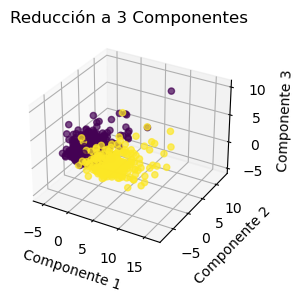

In [11]:
# Gráfico 3D
grafico_3d(pca_components_3d[:, 0], pca_components_3d[:, 1], pca_components_3d[:, 2], dot_colors)

# Multidimensional scaling (MDS)

Documentación [MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) en scikit-learn.

In [12]:
# Importa MDS desde scikit-learn
from sklearn.manifold import MDS

In [13]:
# MDS para 2 componentes
mds_2d = MDS(n_components=2)
mds_components_2d = mds_2d.fit_transform(data_standardized)

# MDS para 3 componentes
mds_3d = MDS(n_components=3)
mds_components_3d = mds_3d.fit_transform(data_standardized)

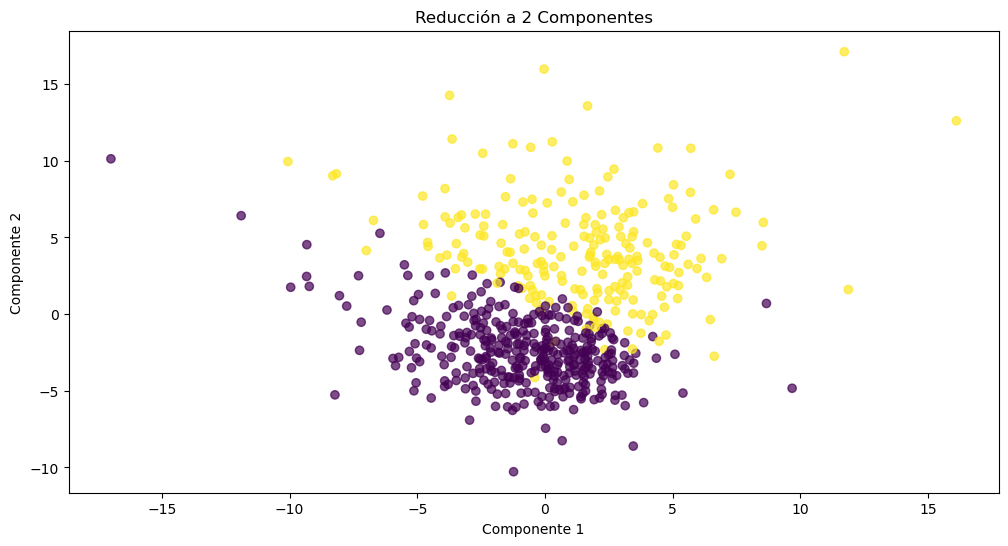

In [14]:
# Gráfico 2d
grafico_2d(mds_components_2d[:, 0], mds_components_2d[:, 1], dot_colors)

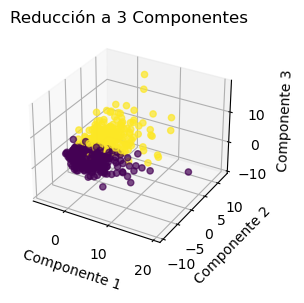

In [15]:
# Gráfico 3D
grafico_3d(mds_components_3d[:, 0], mds_components_3d[:, 1], mds_components_3d[:, 2], dot_colors)

## Isometric mapping (Isomap)

Documentación de [isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html) en scikit-learn.

In [16]:
# Importa isomap desde scikit-learn
from sklearn.manifold import Isomap

In [17]:
# Isomap para 2 componentes
isomap_2d = Isomap(n_components=2)
isomap_components_2d = isomap_2d.fit_transform(data_standardized)

# Isomap para 3 componentes
isomap_3d = Isomap(n_components=3)
isomap_components_3d = isomap_3d.fit_transform(data_standardized)

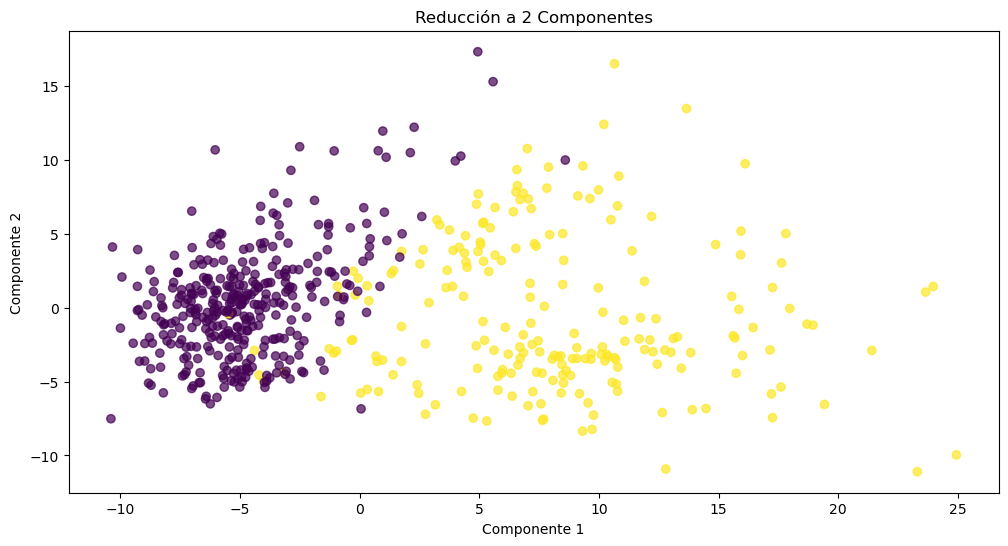

In [18]:
# Gráfico 2d
grafico_2d(isomap_components_2d[:, 0], isomap_components_2d[:, 1], dot_colors)

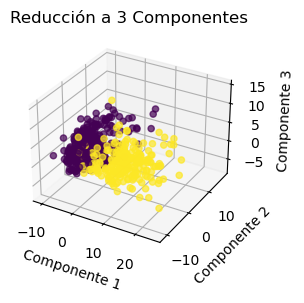

In [19]:
# Gráfico 3D
grafico_3d(isomap_components_3d[:, 0], isomap_components_3d[:, 1], isomap_components_3d[:, 2], dot_colors)

## Comparación de Modelos

### PCA - Varianza Explicada

La varianza explicada se refiere a cuánta variabilidad de tus datos originales es capturada o explicada por cada uno de estos componentes principales. Si un componente principal tiene una alta varianza explicada, significa que captura una gran parte de la información (variabilidad) de tus datos.

In [20]:
# Varianza explicada para 2 y 3 componentes
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

# Cálculo de la varianza explicada acumulada
cumulative_variance_2d = explained_variance_2d.sum()
cumulative_variance_3d = explained_variance_3d.sum()

# Mostrar resultados
print(f"Varianza explicada PCA2: {explained_variance_2d}")
print(f"Varianza acumulada PCA2: {cumulative_variance_2d}")
print(f"Varianza explicada PCA3: {explained_variance_3d}")
print(f"Varianza acumulada PCA3: {cumulative_variance_3d}")

Varianza explicada PCA2: [0.44272026 0.18971182]
Varianza acumulada PCA2: 0.6324320765155947
Varianza explicada PCA3: [0.44272026 0.18971182 0.09393163]
Varianza acumulada PCA3: 0.7263637090898982


### MDS - Error de Ajuste (stress)

El "stress" es una medida comúnmente utilizada para evaluar la calidad de una representación MDS. Indica qué tan bien las distancias en el espacio de baja dimensión (tu representación MDS) coinciden con las distancias en el espacio original de alta dimensión.

Un valor menor de "stress" indica un mejor ajuste. Es decir, las distancias en el espacio reducido reflejan más fielmente las distancias en el espacio original.

In [21]:
# Calculo del stress en MDS
print("Stress 2D: {:.4f}".format(mds_2d.stress_))
print("Stress 3D: {:.4f}".format(mds_3d.stress_))

Stress 2D: 314389.2972
Stress 3D: 114717.4300


### ISOMAP - Error de Reconstrucción

Isomap busca preservar las distancias geodésicas entre puntos. Una forma de medir la calidad de la representación es a través del error de reconstrucción, que mide cuán bien las distancias en el espacio reducido se corresponden con las distancias geodésicas en el espacio original de alta dimensión.

Un error de reconstrucción menor indica una mejor preservación de la estructura geométrica.

In [22]:
# Librerías requeridas
import numpy as np
from sklearn.metrics import euclidean_distances

In [23]:
# Calcular las distancias geodésicas en el espacio original
# Nota: Isomap almacena las distancias geodésicas en su atributo 'training_data_'
distancias_geodesicas_2d = isomap_2d.dist_matrix_

# Calcular las distancias en el espacio transformado
distancias_reducidas_2d = euclidean_distances(isomap_components_2d)

# Calcular el error de reconstrucción
error_reconstruccion_2d = np.mean((distancias_geodesicas_2d - distancias_reducidas_2d)**2)

print("Error de reconstrucción 2D:", error_reconstruccion_2d)

Error de reconstrucción 2D: 13.757025798410888


In [24]:
# Calcular las distancias geodésicas en el espacio original
# Nota: Isomap almacena las distancias geodésicas en su atributo 'training_data_'
distancias_geodesicas_3d = isomap_3d.dist_matrix_

# Calcular las distancias en el espacio transformado
distancias_reducidas_3d = euclidean_distances(isomap_components_3d)

# Calcular el error de reconstrucción
error_reconstruccion_3d = np.mean((distancias_geodesicas_3d - distancias_reducidas_3d)**2)

print("Error de reconstrucción 3D:", error_reconstruccion_3d)

Error de reconstrucción 3D: 7.178930976279985
